<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [ ]:
# Read CSV
house_csv = pd.read_csv("../DATA/Sacramento_transactions.csv")
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#price is the target variable as it is the one we wish to predict

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
#beds, baths, sq_ft, type, logtitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [ ]:
# ANSWER
house_csv.corr()
#beds, baths, sq_ft, and longtitude all have high correlation

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER
#find the mean price
mean_price = house_csv['price'].mean()
print(mean_price)

234144.26395939087


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

<AxesSubplot:>

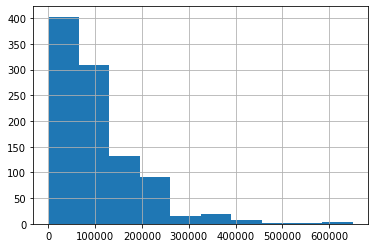

In [ ]:
# ANSWER
house_csv['residual'] = (house_csv['price']-house_csv['price'].mean()).abs()
house_csv.head()


house_csv['residual'].hist()


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [ ]:
# ANSWER
X = house_csv['sq__ft'] 
Y = house_csv['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [ ]:
# ANSWER
yres = Y - np.mean(Y)
xres = X - np.mean(X)

beta_1 = np.sum(yres*xres)/ np.sum(xres**2)

print(beta_1)



54.158639688530755


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [ ]:
# ANSWER
beta_0 = np.mean(Y) - beta_1*np.mean(X)
print(beta_0)

162930.16140699777


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

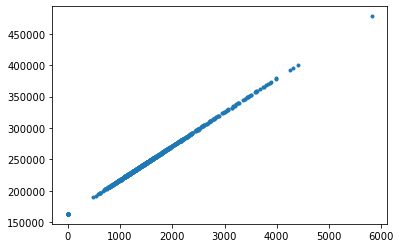

In [ ]:
# ANSWER
Xsorted = np.sort(X)
ypredict = beta_0 + beta_1 * Xsorted
plt.scatter(Xsorted, ypredict, marker = ".")


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [ ]:
# ANSWER
res = Y - (beta_0 + beta_1*X)
print(res)

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Length: 985, dtype: float64


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [ ]:
# ANSWER
def r2func(x,y):
    yres = Y - np.mean(Y)
    xres = X - np.mean(X)
    beta_1 = np.sum(yres*xres)/ np.sum(xres**2)
    beta_0 = np.mean(Y) - beta_1*np.mean(X)
    sstot = np.sum(yres**2)
    ssres = np.sum(res**2)
    R2 = 1 - (ssres/sstot)
    print(R2)
    return(R2)

r2func(X,Y)


0.11148717682951459


0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

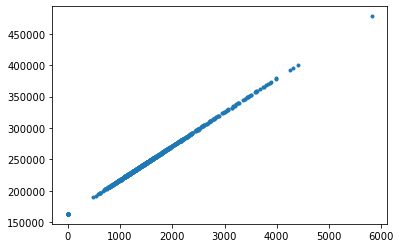

In [ ]:
# ANSWER

plt.scatter(Xsorted,ypredict, marker = "." )

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

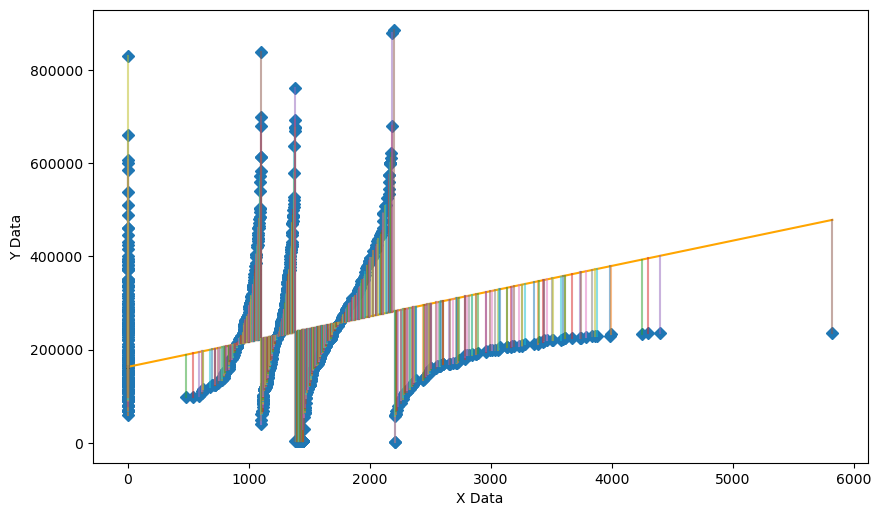

In [ ]:
# ANSWER
def residual_fit_graph(x, y, y_pred, graphWidth=1000, graphHeight=600):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    if isinstance(x, pd.DataFrame):
        x = x.values
    # first the raw data as a scatter plot
    axes.plot(x, y,  'D', alpha = 1)
    # now the model as a line plot
    axes.plot(x, y_pred, color = 'orange')
    # now add individual line for each point
    for X,Y,Y_pred in zip(x, y, y_pred):
        lineXdata = (X, X) # same X
        lineYdata = (Y, Y_pred) # different Y
        plt.plot(lineXdata, lineYdata, alpha = 0.5)
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.show()
    plt.close('all')
residual_fit_graph(Xsorted, Y, ypredict)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER
price = beta_0 + beta_1 * 1204
print(f'Predicted Price is for 120 square foot is {price}')


Predicted Price is for 120 square foot is 228137.1635919888




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



